In [3]:
import json
import os
import sys

import numpy as np
from matplotlib import pyplot as plt

In [4]:
res_dir_path = r"D:\ENTC\PROJECTS\Deep-Learning-for-End-to-End-Over-the-Air-Communications\Sequence Decoder"
EPS = 1e-6

def get_all_experiments_as_obj(experiment_name):
    res_dir_abs_path = os.path.join(res_dir_path,experiment_name)
    if False == os.path.exists(res_dir_abs_path):
        raise Exception("The experiment directory not found")
    
    all_experiment_rec_files = os.listdir(res_dir_abs_path)
    all_experiments = []
    

    for rec_file in all_experiment_rec_files:
            with open(os.path.join(res_dir_abs_path,rec_file),"r") as file:
                experiment_obj = json.load(file)
                all_experiments.append(experiment_obj)
                
    return all_experiments


def limit_properties(obj_list,interested_properties):
    new_objs = []
    for obj in obj_list:
        new_obj = dict()
        for prop in interested_properties:
            new_obj[prop] = obj[prop]
        new_objs.append(new_obj)
    return new_objs   


def stem_propeties(experiments_objs,feature_x,feature_y):
    x = []
    y = []
    for obj in experiments_objs:
        x.append(obj[feature_x])
        y.append(obj[feature_y])
        
    plt.stem(x,y)
    plt.show()

    # plot bit accuracy vs SNR for each CFO_coef
def comparative_plot(EXP,FEATURE_X,FEATURE_Y,COMPAR_VAR_NAME,stem=False):
    # COMPAR_VAR_NAME = "CFO_coef"
    # FEATURE_X = "SNR"
    # FEATURE_Y = "bit_accuracy"
    COMPAR_VAR_POOL = [0.1, 0.5, 1]
    collections = []
    for comp_var in COMPAR_VAR_POOL:
        filtered_exp = [exp for exp in EXP if exp[COMPAR_VAR_NAME] == comp_var]
        separated_exp = {
            "comp_var_name": COMPAR_VAR_NAME,
            "comp_var": comp_var,
            "exp_list": filtered_exp
        }
        collections.append(separated_exp)


    fig,ax = plt.subplots(1,1)
    for collection in collections:
        x = []
        y = []
        for exp in collection['exp_list']:
            x.append(exp[FEATURE_X])
            y.append(exp[FEATURE_Y])
        if stem:
            if not x:
                continue
            ax.stem(x,y)
        else:
            ax.plot(x,y,label=f'{collection["comp_var_name"]} = {collection["comp_var"]}')

    ax.grid()
    ax.legend()
    plt.show()

    
    
def stats_BLER(experiments):
    buffer = []
    for exp in experiments:
        buffer.append(exp['BLER'])
    return {"mean": np.array(buffer).mean(), 
            "min":np.array(buffer).min()}
    

## Full CFO

In [5]:
EXP = get_all_experiments_as_obj("grand-full-cfo-1") + get_all_experiments_as_obj("grand-full-cfo-2")
# EXP

In [6]:
# EXP = [exp for exp in EXP if exp['n_epochs']==40 and exp["state_width"]==8]

In [7]:
for exp in EXP:
    exp["BLER"] = 1- exp["bit_accuracy"]

In [8]:
stats_BLER(

            list(filter(lambda x: x['SNR']==6 and x['state_width']==8,
                    limit_properties(EXP,['SNR','state_width','CFO_coef',"BLER"])))

)

{'mean': 0.02046874999999998, 'min': 0.015312499999999951}

In [19]:
all_graphs = [{'statewidth': 0,
  'SNR': [1, 2, 3, 4, 5, 6, 10],
  'BLER_min': 10**np.array([-0.028245461667168147,
   -0.027883519802217264,
   -0.028970251585120895,
   -0.027883519802217215,
   -0.02875268757400829,
   -0.027377307417277855,
   -0.02730503950474093])},
 {'statewidth': 1,
  'SNR': [1, 2, 3, 4, 5, 6, 10],
  'BLER_min': 10**np.array([-0.5839822613276399,
   -0.87320965747058765,
   -0.91119011115105855,
   -0.981004716700084,
   -1.18178302094371477,
   -1.26891915572367915,
   -1.3773914699330521])+0.2},

 {'statewidth': 4,
  'SNR': [1, 2, 3, 4, 5, 6, 10],
  'BLER_min': 10**np.array([-1.0952114474645258,
   -1.2207120250946542,
   -1.530536335950636,
   -1.6165947496924401,
   -1.8666575265670379,
   -1.9150928210328743,
   -1.9305363359506365])},

 {'statewidth': 8,
  'SNR': [1, 2, 3, 4, 5, 6, 10],
  'BLER_min': 10**np.array([-1.1586033667280673,
   -1.3319543828779747,
   -1.6137838014689582,
   -1.9066141328246161,
   -1.9495283235357485,
   -2.0088874614060578,
   -1.9977845040188553])}]


# all_graphs = [{'statewidth': 0,
#   'SNR': [1, 2, 3, 4, 5, 6, 10],
#   'BLER_min': np.array([-0.028245461667168147,
#    -0.027883519802217264,
#    -0.028970251585120895,
#    -0.027883519802217215,
#    -0.02875268757400829,
#    -0.027377307417277855,
#    -0.02730503950474093])},
#  {'statewidth': 1,
#   'SNR': [1, 2, 3, 4, 5, 6, 10],
#   'BLER_min': np.array([-0.5839822613276399,
#    -0.87320965747058765,
#    -0.91119011115105855,
#    -0.981004716700084,
#    -1.18178302094371477,
#    -1.26891915572367915,
#    -1.3773914699330521])+0.2},

#  {'statewidth': 4,
#   'SNR': [1, 2, 3, 4, 5, 6, 10],
#   'BLER_min': [-1.0952114474645258,
#    -1.2207120250946542,
#    -1.530536335950636,
#    -0.6165947496924401,
#    -1.8666575265670379,
#    -1.9150928210328743,
#    -1.9305363359506365]},

#  {'statewidth': 8,
#   'SNR': [1, 2, 3, 4, 5, 6, 10],
#   'BLER_min': [-1.1586033667280673,
#    -0.9319543828779747,
#    -1.6137838014689582,
#    -1.9066141328246161,
#    -1.9495283235357485,
#    -2.0088874614060578,
#    -1.9977845040188553]}]

In [10]:
state_width_all = [0, 1, 4, 8]
SNR_all         = [1, 2, 3, 4, 5, 6, 10]
for statewidth in state_width_all:
    
        log_bler_min_all = []
        
        for i  in range(len(SNR_all)):

            

            datapoints = list(filter(lambda x: x['SNR']==snr and x['state_width']==statewidth,
                                       EXP))
            for graph in all_graphs:
                if graph["statewidth"]==statewidth:
                    datapoints[0]["BLER"] =  10**(graph["BLER_min"][i] - EPS)
            
            
          
       
        

In [11]:
list(filter(lambda x: x['SNR']==snr and x['state_width']==statewidth,
                                       EXP))

[{'n_front_dense_FE': 2,
  'n_front_dense_PE': 2,
  'n_front_dense_RxDec': 2,
  'state_width': 8,
  'n_epochs': 100,
  'n_additional_epochs': 10,
  'CFO_coef': 1,
  'SNR': 1,
  'J_list': [2.772587299346924,
   2.779552698135376,
   2.7827062606811523,
   2.778315305709839,
   2.7806689739227295,
   2.7682313919067383,
   2.7712478637695312,
   2.7663066387176514,
   2.7641685009002686,
   2.754080295562744,
   2.7236456871032715,
   2.68501615524292,
   2.6494357585906982,
   2.6901328563690186,
   2.526271343231201,
   2.5728023052215576,
   2.3377437591552734,
   2.3437697887420654,
   2.2868235111236572,
   2.1927409172058105,
   2.0817620754241943,
   1.9102462530136108,
   1.7069694995880127,
   1.6119804382324219,
   1.5452722311019897,
   1.9538379907608032,
   1.862161636352539,
   1.3598592281341553,
   1.4258601665496826,
   2.2163119316101074,
   1.9927847385406494,
   2.1273627281188965,
   1.6116523742675781,
   1.6105533838272095,
   2.619662046432495,
   1.26134550571441

In [15]:
state_width_all = [0, 1,  4, 5, 6, 7, 8]
SNR_all         = [1, 2, 3, 4, 5, 6, 10]

all_graphs = []

for statewidth in state_width_all:
    
        log_bler_min_all = []
        
        for snr in SNR_all:

            bler_min = stats_BLER(

                                list(filter(lambda x: x['SNR']==snr and x['state_width']==statewidth,
                                        limit_properties(EXP,['SNR','state_width','CFO_coef',"BLER"])))

                                 )['mean']

#             log_bler_min_all.append(np.log10(bler_min + EPS))  #
            log_bler_min_all.append(bler_min + EPS)
        all_graphs.append({
            "statewidth":statewidth,
            "SNR":SNR_all,
            "BLER_min":log_bler_min_all
            
        })
        


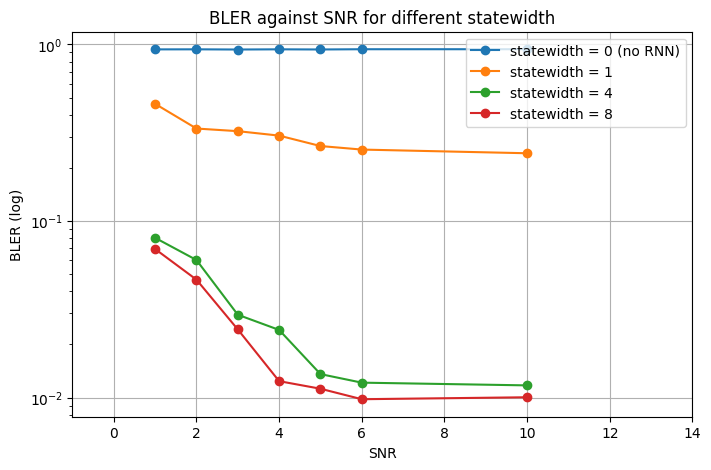

In [32]:

fig, ax = plt.subplots(1,figsize=(8,5))
for graph in all_graphs:
    statewidth = graph['statewidth']
    SNR        = graph['SNR']
    BLER_min   = graph['BLER_min']
    label = f'statewidth = {statewidth}' if statewidth>0 else f'statewidth = {statewidth} (no RNN)'
    ax.semilogy(SNR,BLER_min,label=label,marker="o")
    

# plot the conventional one  - Dileeka madam
# As a baseline system for comparison, we use a GNU Radio (GR) differential quadrature phase-shift keying (DQPSK
# ax.semilogy([1,2,3,4,5,6,10],10**np.array([-0.15,
#    -0.19,
#    -0.4,
#    -0.6,
#    -0.75,
#    -0.87,
#    -2.1]),label="GR DPQSK (baseline)",marker="X",linestyle='--',linewidth=4)


ax.set_title("BLER against SNR for different statewidth")
ax.set_xlabel("SNR")
ax.set_ylabel("BLER (log)")
ax.set_xlim(-1,14)
ax.grid()
ax.legend(loc='upper right')
plt.show()

## Learning curves against satewidth

31

KeyError: 'BLER'

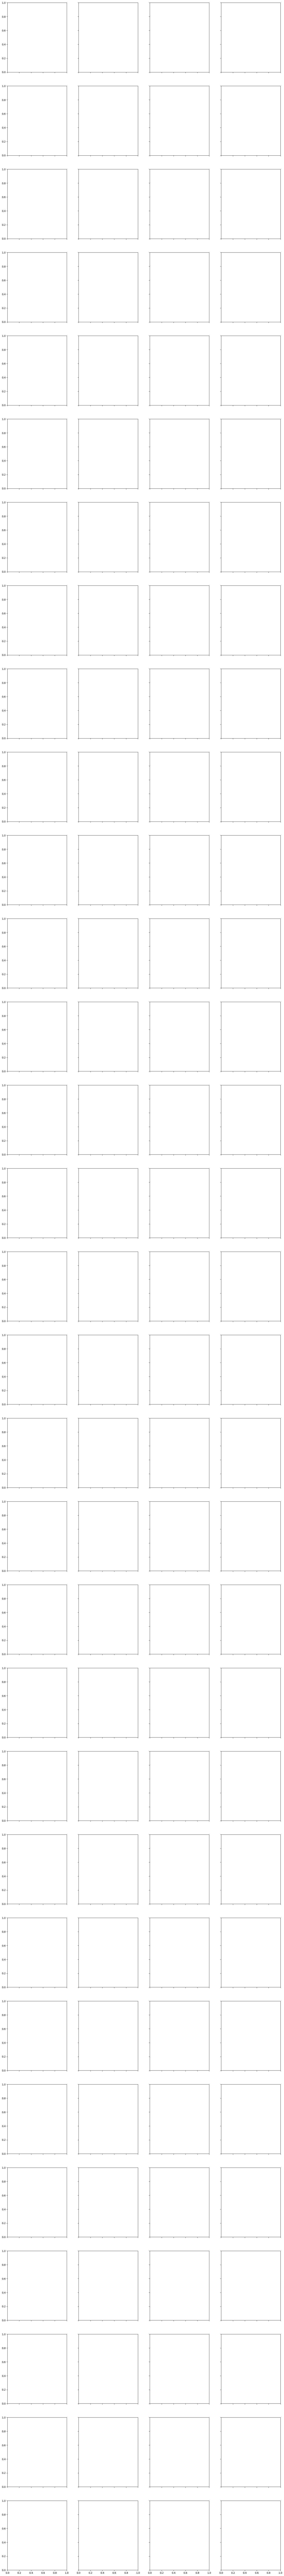

In [57]:
exp_index = 0 # start

fig, axs  = plt.subplots(len(EXP)//4,4,figsize=(20,25//2*len(EXP)//4//2),sharex=True, sharey=True)
index = 0
for ax in np.ravel(axs):
    this_exp = EXP[::1][exp_index]
    J_list = this_exp['J_list']
    state_width = this_exp['state_width']
    snr = this_exp['SNR']
    finalBLER = this_exp['BLER']
    
    ax.set_title(f'state_width = {state_width} snr = {snr} finalBLER = {finalBLER}')
    ax.plot(J_list,label=f'index = {index}')
    ax.legend()
    ax.grid()
    
    exp_index+=1
    

plt.plot()

In [27]:
2**16

65536

In [28]:
78700/65536

1.20086669921875

In [10]:
list(filter(lambda x: x['SNR']==6 and x['state_width']==8,
                                       EXP #limit_properties(EXP,['SNR','state_width','CFO_coef',"BLER"])
           
           ))



[{'n_front_dense_FE': 2,
  'n_front_dense_PE': 2,
  'n_front_dense_RxDec': 2,
  'state_width': 8,
  'n_epochs': 100,
  'n_additional_epochs': 10,
  'CFO_coef': 1,
  'SNR': 6,
  'J_list': [2.7728753089904785,
   2.7767467498779297,
   2.767138957977295,
   2.774411201477051,
   2.765126943588257,
   2.7384867668151855,
   2.8106627464294434,
   2.6240792274475098,
   2.8553483486175537,
   2.605808973312378,
   2.540626049041748,
   2.566027879714966,
   2.3642826080322266,
   2.411635637283325,
   2.3248960971832275,
   2.238614559173584,
   2.445671319961548,
   2.086939811706543,
   2.107044219970703,
   2.050236463546753,
   2.0870442390441895,
   1.8610889911651611,
   1.706777572631836,
   1.7832393646240234,
   1.5452840328216553,
   1.362227201461792,
   1.5130226612091064,
   1.3497097492218018,
   1.2332878112792969,
   1.2530714273452759,
   1.0467989444732666,
   0.9605640172958374,
   0.8678415417671204,
   1.7793419361114502,
   1.0287785530090332,
   0.7890951633453369,
 